## Цель задания

Основная задача аналитика — уметь быстро погружаться в данные.
В этом задании вы попрактикуетесь в исследовании данных.

## Описание задания

Используйте базу транзакций интернет-магазина из Великобритании по ссылке. При исследовании данных можно пользоваться любыми инструментами: Excel, Google Таблицы, Python и т. д.

## Задача

Изучить данные и составить аналитический отчёт.

Отчёт должен включать:

* Описание данных: что отражают, их качество и полнота, некорректности и аномалии.
* Описание применённого подхода к анализу данных: ограничения, накладываемые данными, и соответствующие интерпретации допущения.
* Описание бизнес-заказчика, его гипотетических болей и целей развития бизнеса.
* Описание стейкхолдеров отчёта с обоснованием выбранных метрик (системы метрик).
* Рекомендации по модели данных бизнес-заказчика: что вы считаете важным отслеживать в дополнение к тому, что уже есть в датасете.
* Сформулированные выводы и рекомендации для бизнес-заказчика.

При выполнении задания опирайтесь на изученный материал и дайте волю фантазии при интерпретации и формулировании рекомендаций.

# Финальная работа по курсу "Метрики, гипотезы, точки роста"

**Импорт библиотек Python**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

**Чтение CSV файла.**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Retail.csv')

**Знакомство с данными**

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/19 8:26,"3,39",17850.0,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/19 8:34,"1,69",13047.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/19 8:34,"5,95",13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/19 8:34,"4,95",13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/19 9:02,"2,75",17850.0,United Kingdom


In [ ]:
df.shape

(54214, 8)

In [ ]:
df.describe()

,Quantity,CustomerID
count,54214.000000,40643.000000
mean,9.610802,15283.422803
std,57.358422,1707.982278
min,-9600.000000,12347.000000
25%,1.000000,13969.000000
50%,3.000000,15152.000000
75%,10.000000,16775.000000
max,2400.000000,18287.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    54214 non-null  object 
 1   StockCode    54214 non-null  object 
 2   Description  54080 non-null  object 
 3   Quantity     54214 non-null  int64  
 4   InvoiceDate  54214 non-null  object 
 5   UnitPrice    54214 non-null  object 
 6   CustomerID   40643 non-null  float64
 7   Country      54214 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.3+ MB


*По результатам первичного анализа исходных данных, можно сделать вывод, что в некоторых столбцах предоставленной таблицы есть пропуски в некоторых ячейках. Также в исходных данных присутствуют ложные значения (например "-9600", количество проданных товаров не может быть отрицательным числом).*

**Подготовка данных к анализу**

*Пропуски в столбце "Description", скорее всего, обосновываются тем, что не для всех проданных товаров изначально было описание.
Пропуски в столбце "CustomerID" обосновываются тем, что некоторые покупатели могли совершить покупку несколько раз. Поэтому основное, что нужно сделать - это удалить строки с отрицательными значениями в столбце Quantity.*

In [ ]:
df = df[df.Quantity > 0]

In [ ]:
df.shape

(53131, 8)

*1083 строк было убрано.*

*Замена пропущенных в таблице значений на 0*

In [ ]:
df = df.fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53131 entries, 0 to 54213
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    53131 non-null  object 
 1   StockCode    53131 non-null  object 
 2   Description  53131 non-null  object 
 3   Quantity     53131 non-null  int64  
 4   InvoiceDate  53131 non-null  object 
 5   UnitPrice    53131 non-null  object 
 6   CustomerID   53131 non-null  float64
 7   Country      53131 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.6+ MB


*Приведение столбца UnitPrice к числовому типу*

In [ ]:
df.UnitPrice = pd.to_numeric(df.UnitPrice.replace(',', '.', regex=True), errors='coerce')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/19 8:26,3.39,17850.0,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/19 8:34,1.69,13047.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/19 8:34,5.95,13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/19 8:34,4.95,13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/19 9:02,2.75,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
54209,581585,84832,ZINC WILLIE WINKIE CANDLE STICK,24,12/9/20 12:31,0.85,15804.0,United Kingdom
54210,581585,23084,RABBIT NIGHT LIGHT,12,12/9/20 12:31,2.08,15804.0,United Kingdom
54211,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,12/9/20 12:31,0.42,15804.0,United Kingdom
54212,581587,22631,CIRCUS PARADE LUNCH BOX,12,12/9/20 12:50,1.95,12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53131 entries, 0 to 54213
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    53131 non-null  object 
 1   StockCode    53131 non-null  object 
 2   Description  53131 non-null  object 
 3   Quantity     53131 non-null  int64  
 4   InvoiceDate  53131 non-null  object 
 5   UnitPrice    53131 non-null  float64
 6   CustomerID   53131 non-null  float64
 7   Country      53131 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.6+ MB


*Добавление столбца с итоговой суммой по каждой покупке*

In [ ]:
df['Total'] = df['Quantity'] * df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/19 8:26,3.39,17850.0,United Kingdom,20.34
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/19 8:34,1.69,13047.0,United Kingdom,54.08
2,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/19 8:34,5.95,13047.0,United Kingdom,17.85
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/19 8:34,4.95,13047.0,United Kingdom,14.85
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/19 9:02,2.75,17850.0,United Kingdom,22.00
...,...,...,...,...,...,...,...,...,...
54209,581585,84832,ZINC WILLIE WINKIE CANDLE STICK,24,12/9/20 12:31,0.85,15804.0,United Kingdom,20.40
54210,581585,23084,RABBIT NIGHT LIGHT,12,12/9/20 12:31,2.08,15804.0,United Kingdom,24.96
54211,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,12/9/20 12:31,0.42,15804.0,United Kingdom,10.50
54212,581587,22631,CIRCUS PARADE LUNCH BOX,12,12/9/20 12:50,1.95,12680.0,France,23.40


Разбиваем столбец InvoiceDate на отдельные Date, Time, MonthYear и DayOfWeek после чего удаляем его.

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Date'] = df['InvoiceDate'].dt.date
df['Time'] = df['InvoiceDate'].dt.time
df['MonthYear'] = df['InvoiceDate'].apply(lambda x: x.strftime('%B-%Y')) 
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df = df.drop(['InvoiceDate'], axis=1)
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Total,Date,Time,MonthYear,DayOfWeek
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34,2019-12-01,08:26:00,December-2019,Sunday
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,13047.0,United Kingdom,54.08,2019-12-01,08:34:00,December-2019,Sunday
2,536367,21755,LOVE BUILDING BLOCK WORD,3,5.95,13047.0,United Kingdom,17.85,2019-12-01,08:34:00,December-2019,Sunday
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,4.95,13047.0,United Kingdom,14.85,2019-12-01,08:34:00,December-2019,Sunday
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00,2019-12-01,09:02:00,December-2019,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...
54209,581585,84832,ZINC WILLIE WINKIE CANDLE STICK,24,0.85,15804.0,United Kingdom,20.40,2020-12-09,12:31:00,December-2020,Wednesday
54210,581585,23084,RABBIT NIGHT LIGHT,12,2.08,15804.0,United Kingdom,24.96,2020-12-09,12:31:00,December-2020,Wednesday
54211,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,0.42,15804.0,United Kingdom,10.50,2020-12-09,12:31:00,December-2020,Wednesday
54212,581587,22631,CIRCUS PARADE LUNCH BOX,12,1.95,12680.0,France,23.40,2020-12-09,12:50:00,December-2020,Wednesday


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53131 entries, 0 to 54213
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    53131 non-null  object 
 1   StockCode    53131 non-null  object 
 2   Description  53131 non-null  object 
 3   Quantity     53131 non-null  int64  
 4   UnitPrice    53131 non-null  float64
 5   CustomerID   53131 non-null  float64
 6   Country      53131 non-null  object 
 7   Total        53131 non-null  float64
 8   Date         53131 non-null  object 
 9   Time         53131 non-null  object 
 10  MonthYear    53131 non-null  object 
 11  DayOfWeek    53131 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 5.3+ MB


**Анализ данных**

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Total,Date,Time,MonthYear,DayOfWeek
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,20.34,2019-12-01,08:26:00,December-2019,Sunday
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,13047.0,United Kingdom,54.08,2019-12-01,08:34:00,December-2019,Sunday
2,536367,21755,LOVE BUILDING BLOCK WORD,3,5.95,13047.0,United Kingdom,17.85,2019-12-01,08:34:00,December-2019,Sunday
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,4.95,13047.0,United Kingdom,14.85,2019-12-01,08:34:00,December-2019,Sunday
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,22.00,2019-12-01,09:02:00,December-2019,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...
54209,581585,84832,ZINC WILLIE WINKIE CANDLE STICK,24,0.85,15804.0,United Kingdom,20.40,2020-12-09,12:31:00,December-2020,Wednesday
54210,581585,23084,RABBIT NIGHT LIGHT,12,2.08,15804.0,United Kingdom,24.96,2020-12-09,12:31:00,December-2020,Wednesday
54211,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,0.42,15804.0,United Kingdom,10.50,2020-12-09,12:31:00,December-2020,Wednesday
54212,581587,22631,CIRCUS PARADE LUNCH BOX,12,1.95,12680.0,France,23.40,2020-12-09,12:50:00,December-2020,Wednesday


*Количество уникальных товаров в магазине*

In [ ]:
df.StockCode.nunique()

3309

*Количество уникальных покупателей.*

In [ ]:
df.CustomerID.nunique()

3793

*Количество уникальных пользователей по с разбивкой по странам.*



In [ ]:
pd.pivot_table(df, index="Country", values="CustomerID", aggfunc='nunique', margins=True).sort_values(by='CustomerID', ascending=False)

,CustomerID
Country,
All,3793
United Kingdom,3416
Germany,86
France,80
Spain,26
Belgium,24
Switzerland,20
Portugal,19
Italy,13


*Количество уникальных транзакций*

In [ ]:
df.InvoiceNo.nunique()

14008

*Количество уникальных транзакций разбитые по странам*

In [ ]:
pd.pivot_table(df, index="Country", values="InvoiceNo", aggfunc='nunique', margins=True ).sort_values(by='InvoiceNo', ascending=False)

,InvoiceNo
Country,
All,14008
United Kingdom,12580
Germany,323
France,297
EIRE,229
Belgium,81
Spain,70
Netherlands,61
Portugal,46


*Количество проданного товара и выручка, разбитые по странам*

In [ ]:
pd.pivot_table(df, index='Country', values=['Total', 'Quantity'], aggfunc=np.sum, margins=True).sort_values(by='Quantity', ascending=False)

,Quantity,Total
Country,,
All,555980,1056167.991
United Kingdom,460395,892222.871
Netherlands,20930,26489.180
EIRE,14305,29008.610
Germany,12218,23706.160
France,11423,19811.480
Australia,10009,17156.590
Sweden,4440,4936.520
Switzerland,3541,6215.900


*График выручки по месяцам*

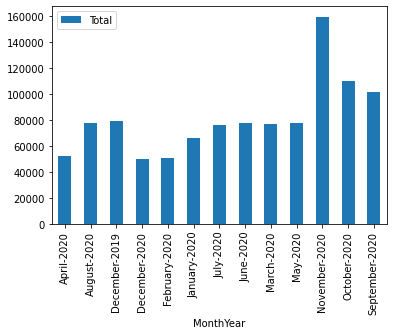

In [ ]:
df.groupby(['MonthYear'])[['Total']].sum().plot(kind='bar')

*График количества заказов по месяцам.*

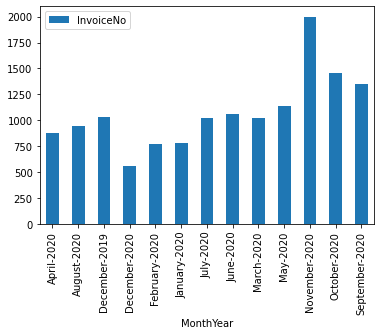

In [ ]:
df.groupby(['MonthYear'])[['InvoiceNo']].nunique().plot(kind='bar')

*График количества заказов по дням недели.*

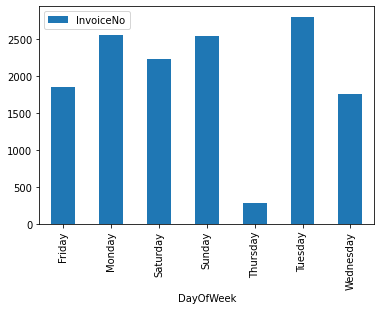

In [ ]:
df.groupby(by=['DayOfWeek'])[['InvoiceNo']].nunique().plot(kind='bar')

*Средний чек по месяцам.*

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text major ticklabel objects>)

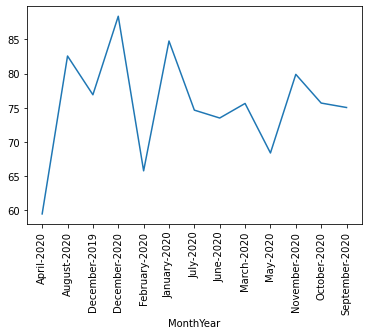

In [ ]:
avgcheck = df.groupby(df['MonthYear'])['Total'].sum().divide(df.groupby(df['MonthYear'])['InvoiceNo'].nunique())
plot = sns.lineplot(data=avgcheck)
plt.xticks(rotation='vertical')

*LTV (TOP 10)* 

In [ ]:
df.groupby(df['CustomerID'])['Total'].sum().sort_values(ascending=False).head(10)

CustomerID
0.0        173875.42
18102.0     26533.44
14646.0     25519.16
17450.0     23000.10
12415.0     16102.89
14911.0     15238.45
14156.0     12092.71
17949.0     12048.08
17511.0      9534.21
14096.0      8487.80
Name: Total, dtype: float64